# LIST OF REGRESSION ALGORITHMS IN MACHINE LEARNING


Linear Regression

Ridge Regression

Neural Network Regression 

Lasso Regression 

Decision Tree Regression 

Random Forest

KNN Model

Support Vector Machines (SVM)

Gausian Regression

Polynomial Regression

In [2]:
## Load Imports


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


In [7]:
## Load Simple Dataset

df=pd.read_csv('bottle.csv')


In [8]:
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_main=df[['Salnty', 'T_degC']]


df_main.columns=['Sal', 'Temp']

In [22]:
df_main.head()

,Sal,Temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


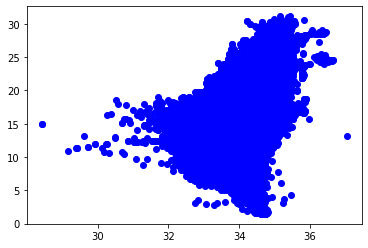

In [23]:
##Plotting Graph 

plt.scatter(df_main['Sal'],df_main['Temp'],c='blue')

In [27]:
## Check for NAN value

df_main.isnull().sum()

Sal     47354
Temp    10963
dtype: int64

In [33]:
df_main['Sal'].fillna(method='ffill',inplace=True)
df_main['Temp'].fillna(method='ffill',inplace=True)

df_main.isnull().sum()

Sal     0
Temp    0
dtype: int64

In [34]:
## Co-relationship between Sal and Temp

from scipy.stats import pearsonr

corr, _ = pearsonr(df_main['Sal'],df_main['Temp'])


In [35]:
corr

-0.4519458489676772

DataSet is simple with only 1 Feature

In [65]:
## Splitting data to Dependent and Indepenent features
## Since this is single feature analysis we have to reshape the array
## to reshape also can be done like [[df_main['Sal']]]

X=np.array(df_main['Sal']).reshape(-1,1)
y=np.array(df_main['Temp']).reshape(-1,1)


# Simple Linear Regression

With Regression is : 0.20304012196697485
0.20545482544173832


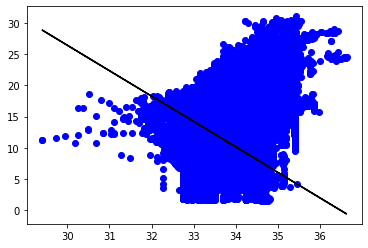

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


## Splitting Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

## Applying Simple Linear Regression Algorithm
reg = LinearRegression().fit(X_train, y_train)

## Score Identification for Train
linRegScore=reg.score(X_train, y_train)
print("With Regression is : "+str(linRegScore))

## Prediction
y_pred=reg.predict(X_test)

## Accuracy Score for Test
print(reg.score(X_test,y_test))

## Plotting graph
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

# Making Pickle File

In [54]:
import pickle
pickle.dump(reg,open('model.pkl','wb'))

In [56]:
picked_model=pickle.load(open('model.pkl','rb'))
picked_model.predict(X_test)

array([[12.3815795 ],
       [ 8.46659763],
       [12.31152193],
       ...,
       [ 7.80723226],
       [ 7.34979754],
       [11.87057134]])

In [ ]:
## Pickel saves in serialize format 

In [58]:
dict_test={
    'Sal' : 40.56
}

In [59]:
dict_test

{'Sal': 40.56}

In [60]:
dict_test.keys()

dict_keys(['Sal'])

In [61]:
dict_test.values()

dict_values([40.56])

In [62]:
list(dict_test.values())

[40.56]

In [67]:
[list(dict_test.values())]

[[40.56]]

In [69]:
picked_model.predict([list(dict_test.values())])[0]

array([-16.91896905])

# Algorithms on Multivariate Analysis

Imports

In [3]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

Skipping first row since its the main heading


Giving Header=None --> will not create any header

Giving skiprows=1 --> skip the no of rows from starting

In [32]:
df=pd.read_csv('machine.csv', header=None)

In [33]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


Renaming Column Values

In [34]:
df=df.rename(columns={0:'VendorName',1:'ModelName',2:'MYCT',3:'MMIN',4:'MMAX',5:'CACH',6:'CHMIN',7:'CHMAX',8:'PRP',9:'ERP'})

In [35]:
df.columns

Index(['VendorName', 'ModelName', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')

In [36]:
df.head()

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [38]:
df.isnull().sum()

VendorName    0
ModelName     0
MYCT          0
MMIN          0
MMAX          0
CACH          0
CHMIN         0
CHMAX         0
PRP           0
ERP           0
dtype: int64

Deteching Outliers

C:\Users\saads\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRP'>

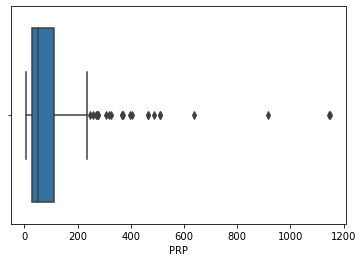

In [39]:
import seaborn as sns

sns.boxplot(df['PRP'])

Separting Data into Train and Test

In [40]:
X=df.drop(['VendorName', 'ModelName'], axis = 1)
y=df.iloc[:,-1]


# RIDGE REGRESSION

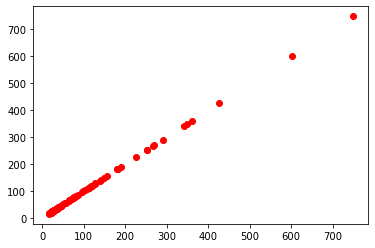

ridge_regressor score :  0.9999999999967426


In [30]:
## Splitting Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

##Importing Ridge
from sklearn.linear_model import Ridge

## Fitting Ridge
ridge_regressor = Ridge(alpha = 0.5, normalize = False, tol = 0.001, solver ='auto', random_state = 42)
ridge_regressor.fit(X_train, y_train)

# predicting the y_test
y_pred = ridge_regressor.predict(X_test)

# Plotting
plt.scatter(y_pred, y_test, color = 'red')
plt.show()
  
# finding score for our model
score = ridge_regressor.score(X_test, y_test)
print("ridge_regressor score : ", score)


# LINEAR REGRESSION

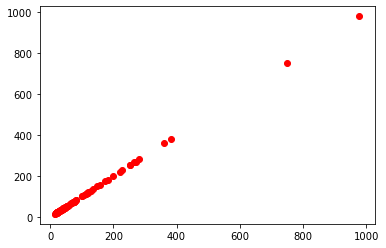

Linear Regressor Score for Test : 1.0
r2 for Test :  1.0


In [29]:
from sklearn.linear_model import LinearRegression

## Splitting Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

## Applying Simple Linear Regression Algorithm
reg = LinearRegression().fit(X_train, y_train)

# ## Score Identification for Train
# linRegScoreTrain=reg.score(X_train, y_train)
# print("Linear Regressor Score for Train : ",linRegScoreTrain)

## Prediction
y_pred=reg.predict(X_test)

# Plotting
plt.scatter(y_pred, y_test, color = 'red')
plt.show()

# ##Randomly checking for Train data.. to check overfitting
# pred_train_lr = reg.predict(X_train)

## Accuracy Score for Test
print("Linear Regressor Score for Test :",reg.score(X_test,y_test))

# print("Linear Regressor Score for Train --> MSE ::",np.sqrt(mean_squared_error(y_train,pred_train_lr)))
# print("r2 for Train : ",r2_score(y_train, pred_train_lr))
print("r2 for Test : ",r2_score(y_test,y_pred))

# LASSO REGRESSION

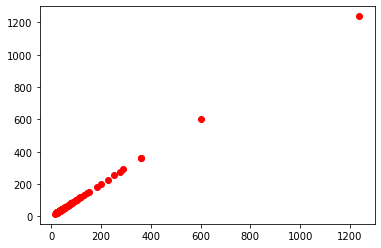

0.9999996105800786


In [28]:
from sklearn.linear_model import Lasso

## Splitting Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

## Calling Lasso
lasso_regressor = Lasso(alpha=1.0)

# fit model
lasso_regressor.fit(X_train, y_train)

# make a prediction
y_pred = lasso_regressor.predict(X_test)

# Plotting
plt.scatter(y_pred, y_test, color = 'red')
plt.show()

#Score for Lasso
lasso_regressor.score(X_test,y_test)
print(lasso_regressor.score(X_test,y_test))

# ELASTIC NET

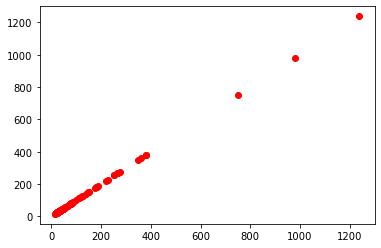

0.9999999282719818


In [27]:
from sklearn.linear_model import ElasticNet

## Splitting Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

## Calling Elastic
elastic_regressor = ElasticNet(random_state=0)

# fit model
elastic_regressor.fit(X_train, y_train)

# make a prediction
y_pred = elastic_regressor.predict(X_test)

# Plotting
plt.scatter(y_pred, y_test, color = 'red')
plt.show()

#Score for Elastic
elastic_regressor.score(X_test,y_test)
print(elastic_regressor.score(X_test,y_test))

# RANDOM FOREST

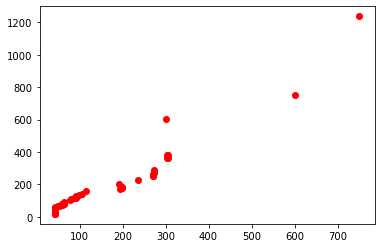

0.8555512637163516


In [26]:
from sklearn.ensemble import RandomForestRegressor

## Splitting Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

## Calling Random Forest
randomFor_regressor = RandomForestRegressor(max_depth=2, random_state=0)

# fit model
randomFor_regressor.fit(X_train, y_train)

# make a prediction
y_pred = randomFor_regressor.predict(X_test)

# Plotting
plt.scatter(y_pred, y_test, color = 'red')
plt.show()

#Score for  Random Forest
randomFor_regressor.score(X_test,y_test)
print(randomFor_regressor.score(X_test,y_test))

# DECISION TREE

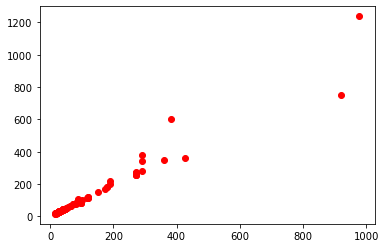

0.9408955928676593
Accuracy: 0.96 (+/- 0.22)


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor


## Splitting Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)


DecTree_regressor = DecisionTreeRegressor(random_state=0)


DecTree_regressor.fit(X_train, y_train)


y_pred=DecTree_regressor.predict(X_test)


plt.scatter(y_pred, y_test, color = 'red')
plt.show()


print(DecTree_regressor.score(X_test,y_test))


scores = cross_val_score(DecTree_regressor, X_train, y_train, cv=10)


print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


# SVM

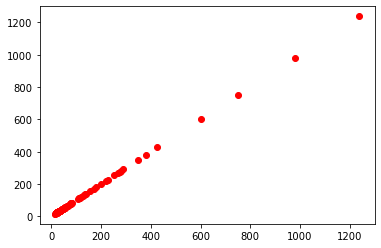

1.0


In [42]:
from sklearn.svm import SVC

## Splitting Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

SVC_regressor = SVC(kernel = 'linear',gamma = 'scale', shrinking = False)

SVC_regressor.fit(X, y)

y_pred=SVC_regressor.predict(X_test)


plt.scatter(y_pred, y_test, color = 'red')
plt.show()


print(SVC_regressor.score(X_test,y_test))

